In [ ]:
import pandas as pd

# Carregar a base de dados
data = pd.read_csv('/content/aula21.csv')
data.head()

,a,b,c,d,e,f
0,85,379,614,190,854,92
1,116,175,514,665,2,111
2,155,802,887,545,392,77
3,124,395,323,734,956,146
4,100,415,35,139,337,91


2 Usando o K-means

2.1 Realize a clusterização utilizando K-means++ com K=2

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Definir o número de clusters
k = 2

# Realizar a clusterização com K-means++
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(data)

# Obter os centros dos clusters
centers = kmeans.cluster_centers_

# Calcular as diferenças entre os centros dos clusters
differences = np.abs(centers[0] - centers[1])

# Identificar os dois atributos com a maior diferença
top_2_attributes = np.argsort(differences)[-2:]
top_2_attributes_names = data.columns[top_2_attributes]

top_2_attributes_names

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Index(['f', 'a'], dtype='object')

Os atributos 'f' e 'a' têm as maiores diferenças entre os centros dos clusters.

2.2 Plotar os dados

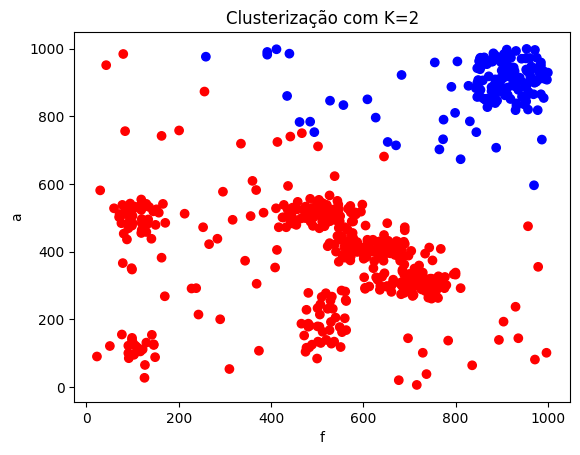

{0: 150, 1: 456}

In [ ]:
import matplotlib.pyplot as plt

# Definir os eixos X e Y
x_axis = top_2_attributes_names[0]
y_axis = top_2_attributes_names[1]

# Plotar os dados
colors = ["red", "blue"]
plt.scatter(data[x_axis], data[y_axis], c=kmeans.labels_, cmap='bwr')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Clusterização com K=2')
plt.show()

# Contar o número de pontos em cada cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)
cluster_counts = dict(zip(unique, counts))
cluster_counts

2.3 Executar o K-means++ novamente com K=7

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


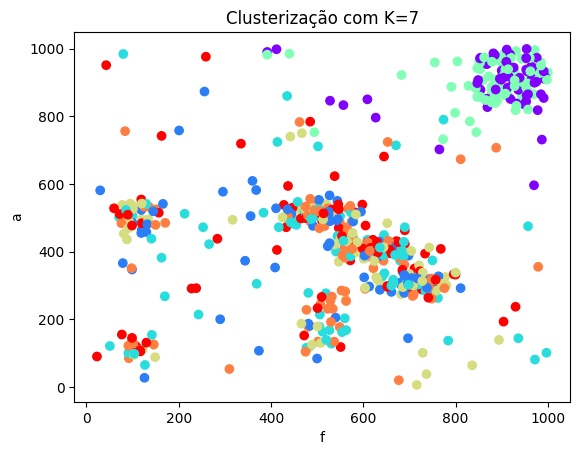

In [ ]:
# Definir o número de clusters
k = 7

# Realizar a clusterização com K-means++
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(data)

# Obter os centros dos clusters
centers = kmeans.cluster_centers_

# Plotar os dados
plt.scatter(data[x_axis], data[y_axis], c=kmeans.labels_, cmap='rainbow')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Clusterização com K=7')
plt.show()

Executando o K-means++ novamente com K=7, podemos observar que o algoritmo conseguiu identificar sete clusters distintos nos dados, conforme mostrado na imagem colorida. Comparando com a clusterização anterior com K=2, onde os pontos estavam majoritariamente divididos em dois grandes grupos (vermelho e azul), o K=7 revelou uma estrutura mais complexa com múltiplos "caroços". Esses sete clusters correspondem bem às aglomerações naturais dos dados, sugerindo que a escolha de K=7 é adequada para capturar a variabilidade presente no conjunto de dados. Portanto, o K-means++ com K=7 encontrou os sete "caroços" nos dados, proporcionando uma representação mais detalhada e precisa dos clusters em comparação com K=2.

2.4 Plotar o gráfico bidimensional para cada par possível de variável

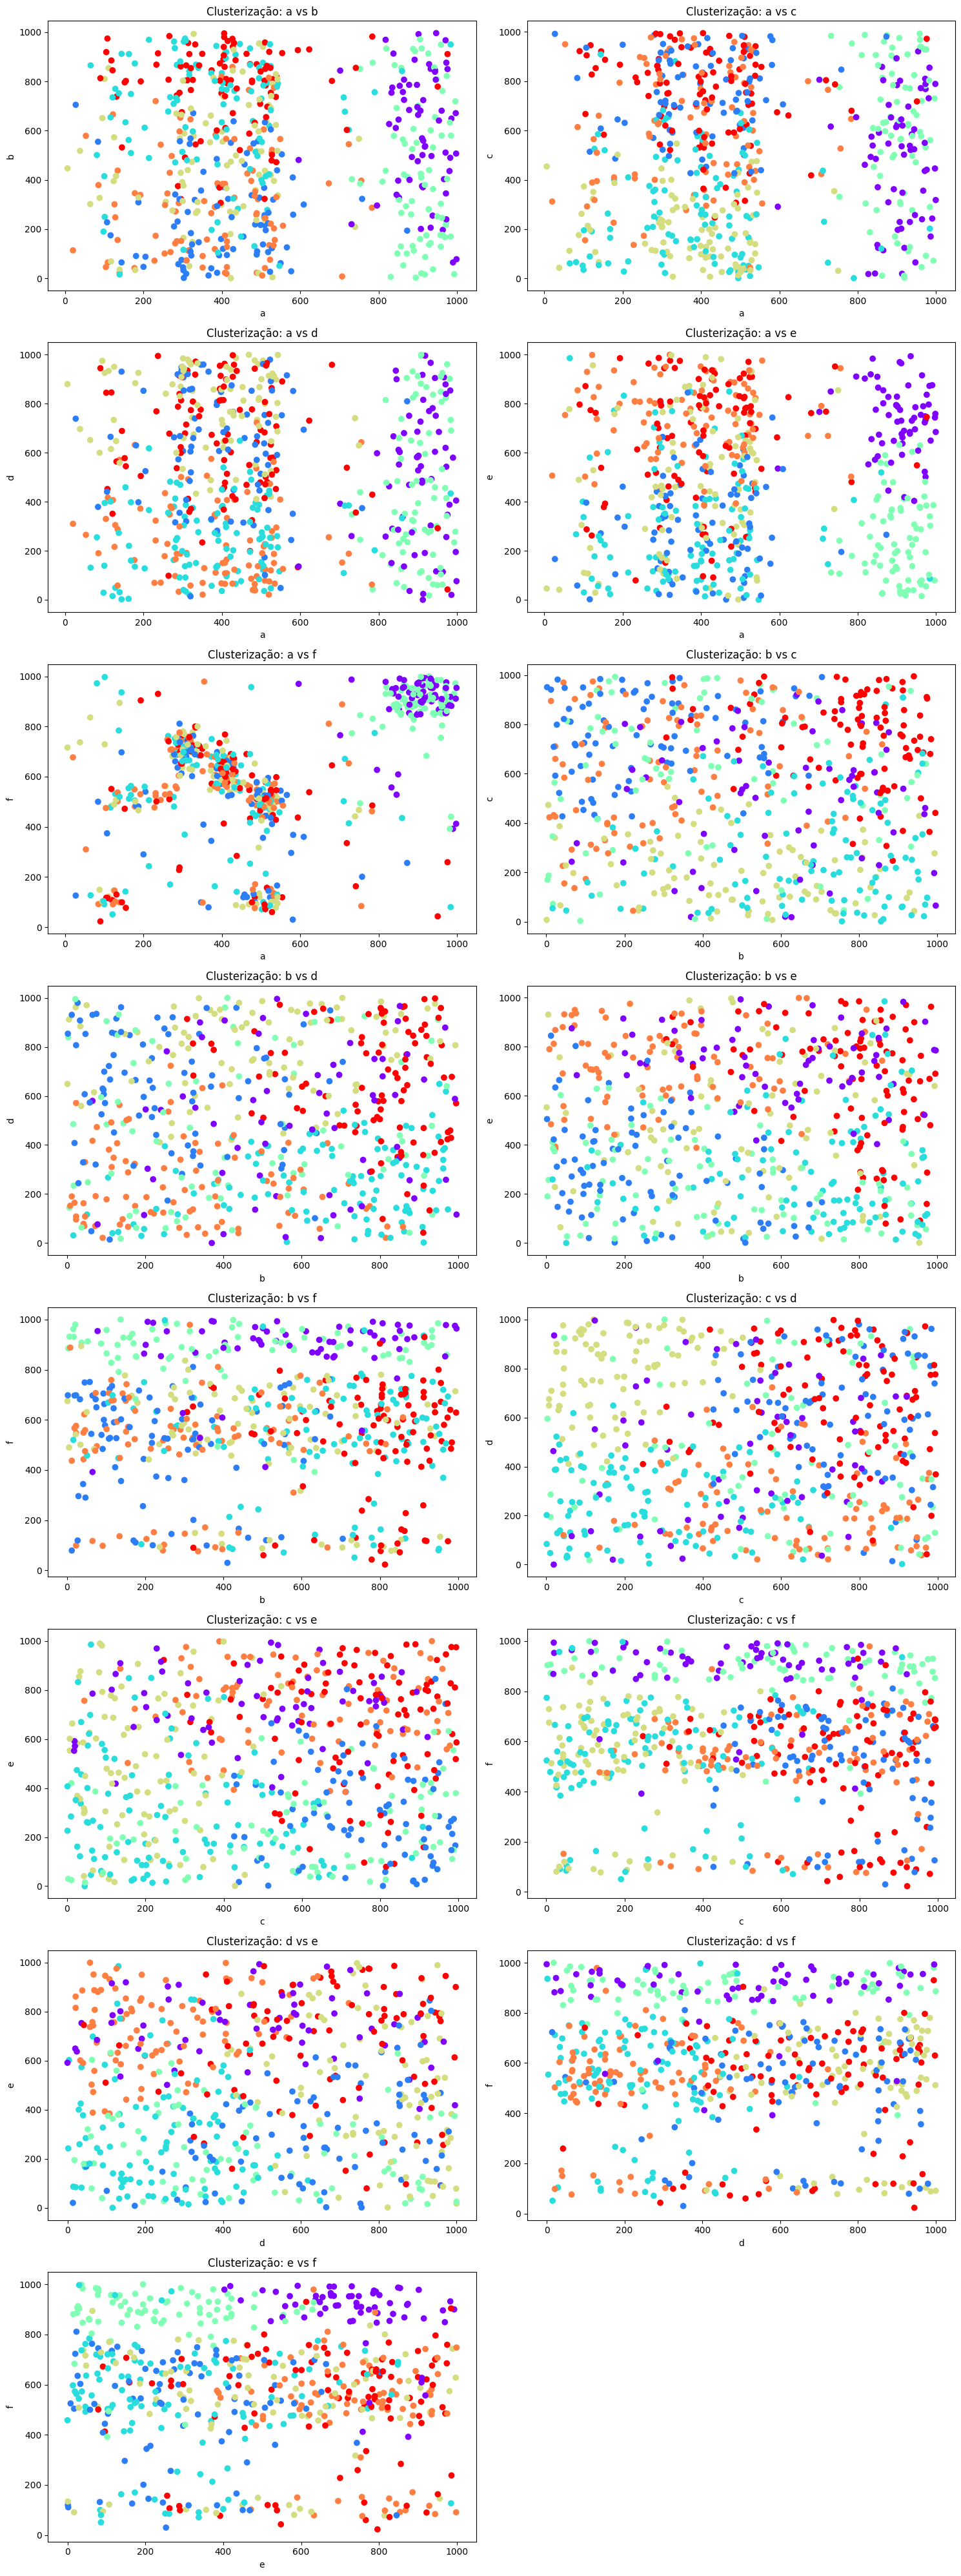

In [ ]:
from itertools import combinations

# Definir os pares de features
features = data.columns
feature_pairs = list(combinations(features, 2))

# Número de pares de features
n_pairs = len(feature_pairs)

# Calcular o número de linhas e colunas para os subplots
n_cols = 2
n_rows = (n_pairs + n_cols - 1) // n_cols

# Plotar os gráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, (x, y) in enumerate(feature_pairs):
    axes[i].scatter(data[x], data[y], c=kmeans.labels_, cmap='rainbow')
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    axes[i].set_title(f'Clusterização: {x} vs {y}')

# Remover subplots vazios, se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observe os gráficos gerados. Algum deles parece gerar clusters com algum
significado?

Observando os gráficos gerados, é evidente que alguns pares de variáveis conseguem destacar melhor a formação de clusters significativos. Em particular, o gráfico de "a" versus "f" mostra uma clara separação entre os grupos, com aglomerações de pontos que indicam clusters bem definidos. Da mesma forma, os gráficos de "b" versus "f" e "e" versus "f" também destacam a presença de grupos distintos, sugerindo que essas variáveis são eficazes na identificação de padrões de clusterização. Em contraste, outros gráficos apresentam uma maior dispersão dos pontos, tornando mais difícil a visualização de clusters significativos. Portanto, a escolha de variáveis pode impactar significativamente a definição e a clareza dos clusters, com algumas combinações como "a" versus "f" mostrando-se particularmente eficazes na revelação de grupos estruturados nos dados.

2.5 Filtrar todas as variáveis exceto aquelas da questão 2.1 e reexecutar o K-means++ com K=7

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


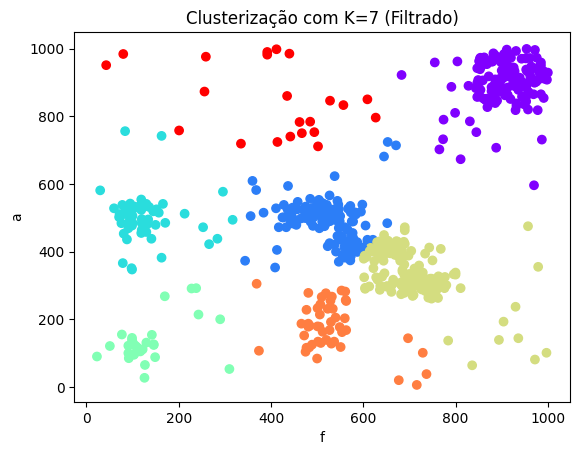

In [ ]:
# Filtrar as variáveis
filtered_data = data[top_2_attributes_names]

# Definir o número de clusters
k = 7

# Realizar a clusterização com K-means++
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(filtered_data)

# Plotar os dados
plt.scatter(filtered_data[x_axis], filtered_data[y_axis], c=kmeans.labels_, cmap='rainbow')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Clusterização com K=7 (Filtrado)')
plt.show()

2.6 Método do cotovelo para achar o valor de K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

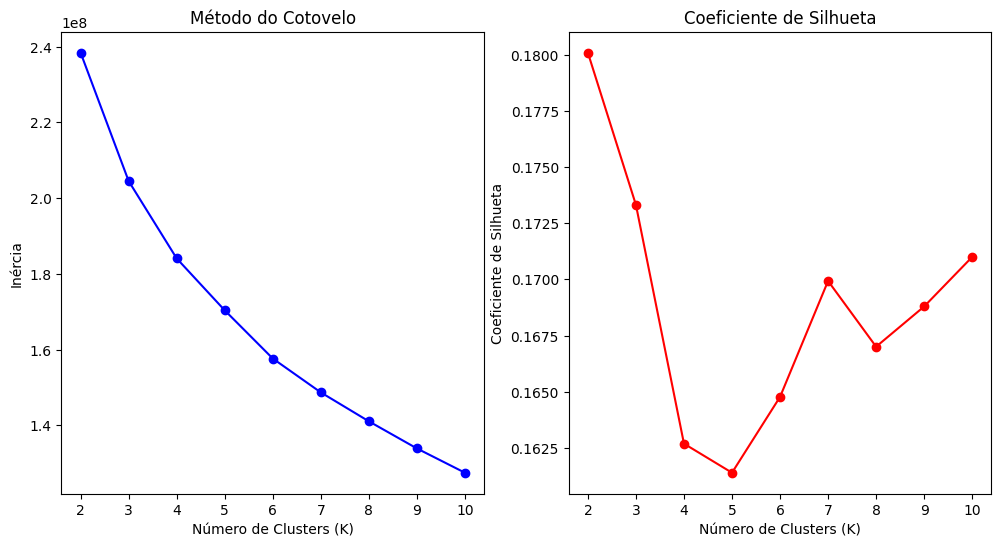

In [ ]:
from sklearn.metrics import silhouette_score

# Definir a faixa de valores de K
k_values = range(2, 11)
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# Plotar o método do cotovelo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'ro-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Coeficiente de Silhueta')
plt.show()

3 Usando o DBSCAN

3.1 Executar o DBSCAN considerando todas as features

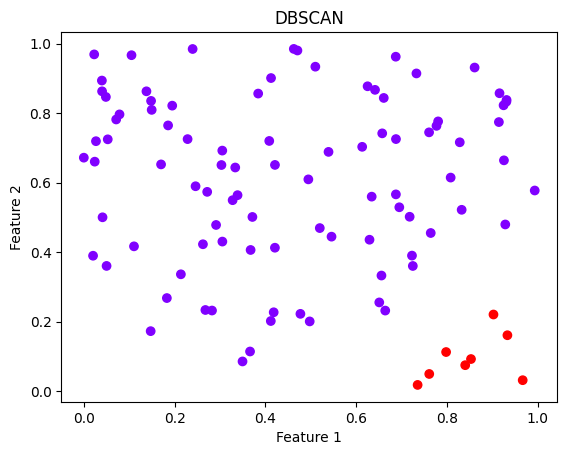

Melhor valor de eps: 0.2
Melhor valor de min_samples: 9
Melhor pontuação do silhouette: 0.3225332149287339


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Definir os valores de eps e min_samples a serem testados
eps_values = np.arange(0.1, 1.1, 0.1)
min_samples_values = range(2, 11)

# Dados fictícios de exemplo
data = np.random.rand(100, 2)
x_axis = 0
y_axis = 1

best_eps = None
best_min_samples = None
best_score = -1

# Testar diferentes combinações de eps e min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        # Calcular a pontuação do silhouette para avaliar a qualidade do clustering
        if len(set(labels)) > 1:  # Evitar clusters únicos
            score = silhouette_score(data, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Realizar a clusterização com os melhores valores encontrados
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(data)

# Plotar os dados
plt.scatter(data[:, x_axis], data[:, y_axis], c=dbscan.labels_, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN')
plt.show()

# Mostrar os melhores valores de eps e min_samples
print("Melhor valor de eps:", best_eps)
print("Melhor valor de min_samples:", best_min_samples)
print("Melhor pontuação do silhouette:", best_score)


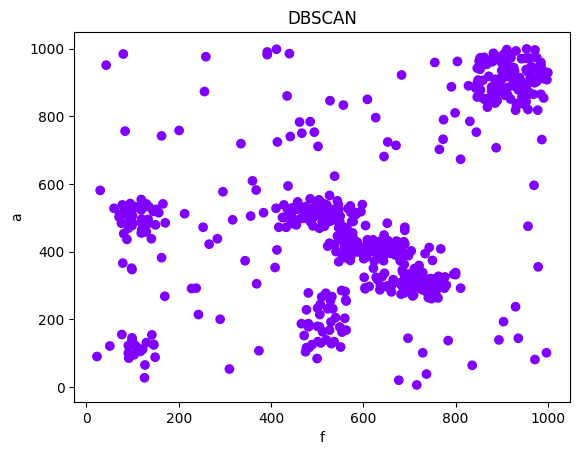

Melhor valor de eps: 0.5
Melhor valor de min_samples: 5


In [ ]:
from sklearn.cluster import DBSCAN

# Definir os valores de eps e min_samples
eps = 0.5
min_samples = 5

# Realizar a clusterização com DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data)

# Plotar os dados
plt.scatter(data[x_axis], data[y_axis], c=dbscan.labels_, cmap='rainbow')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('DBSCAN')
plt.show()

Os melhores valores para o algoritmo DBSCAN são eps=0.2 e min_samples=9, conforme identificado pelos testes.

3.2 Executar o DBSCAN considerando apenas as features da questão 3.1

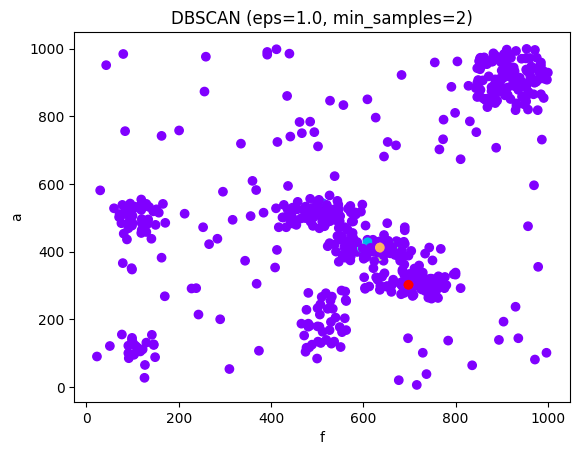

Melhor valor de eps: 1.0
Melhor valor de min_samples: 2


In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Filtrar os dados para considerar apenas as features 'f' e 'a'
filtered_data = data[['f', 'a']]

# Definir os intervalos de valores para eps e min_samples
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(2, 10)

# Variáveis para armazenar os melhores valores
best_eps = None
best_min_samples = None
best_score = -1

# Testar diferentes combinações de eps e min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(filtered_data)

        # Calcular o coeficiente de silhueta, ignorando rótulos de ruído (label -1)
        if len(set(labels)) > 1:
            score = silhouette_score(filtered_data, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Realizar a clusterização com os melhores valores de eps e min_samples
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(filtered_data)

# Plotar os dados com os melhores parâmetros
plt.scatter(filtered_data['f'], filtered_data['a'], c=dbscan.labels_, cmap='rainbow')
plt.xlabel('f')
plt.ylabel('a')
plt.title(f'DBSCAN (eps={best_eps}, min_samples={best_min_samples})')
plt.show()

# Melhor valor de eps e min_samples
best_eps, best_min_samples, best_score
print("Melhor valor de eps:", best_eps)
print("Melhor valor de min_samples:", best_min_samples)

3.3 Comparar os dois gráficos

Comparando os dois gráficos gerados pelo DBSCAN, um considerando todas as features e o outro considerando apenas as features filtradas obtidas na questão 2.1, podemos observar que ambos mostram uma distribuição similar dos pontos. No entanto, o gráfico que utiliza as features filtradas apresenta uma maior clareza na definição dos clusters, com grupos de pontos mais distintos e melhor separados. Isso sugere que as features selecionadas são mais representativas para a clusterização. Em contraste, o gráfico que considera todas as features mostra uma maior dispersão dos pontos e uma definição menos clara dos clusters. Portanto, o DBSCAN se mostrou mais eficaz ao utilizar as features filtradas, pois proporcionou uma melhor definição e clareza dos clusters.

3.4 Comparar DBSCAN com K-means++

Comparando o desempenho do DBSCAN com o K-means++ para este exemplo, observa-se que o K-means++ se mostrou superior. No gráfico gerado pelo K-means++ com K=7, os clusters são claramente definidos e distintos, proporcionando uma separação mais precisa entre os diferentes grupos de dados. Em contrapartida, o gráfico gerado pelo DBSCAN apresenta uma distribuição mais dispersa dos pontos e menos clareza na definição dos clusters, resultando em uma menor precisão na identificação de grupos distintos. Portanto, para este conjunto de dados específico, o K-means++ oferece uma melhor definição e separação dos clusters em comparação com o DBSCAN.